In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import pathlib

# Data preprocessing

In [2]:
tf.__version__

'2.5.0'

In [3]:
image_input = sorted(tf.io.gfile.glob('./ISIC2018_Task1-2_Training_Input_x2/*.jpg'))

In [4]:
len(image_input)

2594

In [5]:
ground_truth = sorted(tf.io.gfile.glob('./ISIC2018_Task1_Training_GroundTruth_x2/*.png'))

In [6]:
len(ground_truth)

2594

In [7]:
image_input[:5]

['.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0000000.jpg',
 '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0000001.jpg',
 '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0000003.jpg',
 '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0000004.jpg',
 '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0000006.jpg']

In [8]:
ground_truth[:5]

['.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0000000_segmentation.png',
 '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0000001_segmentation.png',
 '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0000003_segmentation.png',
 '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0000004_segmentation.png',
 '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0000006_segmentation.png']

In [9]:
# Disorder the data and keep the input image and truth ground one-to-one correspondence
index = np.random.permutation(len(image_input))
image_input = np.array(image_input)[index]
ground_truth = np.array(ground_truth)[index]

In [10]:
image_input[:5]

array(['.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0000159.jpg',
       '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0009981.jpg',
       '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0011140.jpg',
       '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0014693.jpg',
       '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0012235.jpg'],
      dtype='<U53')

In [11]:
ground_truth[:5]

array(['.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0000159_segmentation.png',
       '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0009981_segmentation.png',
       '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0011140_segmentation.png',
       '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0014693_segmentation.png',
       '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0012235_segmentation.png'],
      dtype='<U70')

In [12]:
length = len(image_input)
print(length)

2594


In [13]:
image_input_val = image_input[:(int(length*0.2))]
print(len(image_input_val))
ground_truth_val = ground_truth[:(int(length*0.2))]
print(len(ground_truth_val))

518
518


In [14]:
image_input_val[:5]

array(['.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0000159.jpg',
       '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0009981.jpg',
       '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0011140.jpg',
       '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0014693.jpg',
       '.\\ISIC2018_Task1-2_Training_Input_x2\\ISIC_0012235.jpg'],
      dtype='<U53')

In [15]:
ground_truth_val[:5]

array(['.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0000159_segmentation.png',
       '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0009981_segmentation.png',
       '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0011140_segmentation.png',
       '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0014693_segmentation.png',
       '.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0012235_segmentation.png'],
      dtype='<U70')

In [16]:
image_input_test = image_input[int(length*0.2):int(length*0.4)]
ground_truth_test = ground_truth[int(length*0.2):int(length*0.4)]

In [17]:
image_input_train = image_input[int(length*0.4):]
ground_truth_train = ground_truth[int(length*0.4):]

In [18]:
print(len(image_input_train))
print(len(ground_truth_train))

1557
1557


In [19]:
ground_truth_val[-1]

'.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0014989_segmentation.png'

In [20]:
ground_truth_train[0]

'.\\ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0013160_segmentation.png'

In [21]:
train_ds = tf.data.Dataset.from_tensor_slices((image_input_train, ground_truth_train))

In [22]:
train_ds

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [23]:
val_ds = tf.data.Dataset.from_tensor_slices((image_input_val, ground_truth_val))

In [24]:
test_ds = tf.data.Dataset.from_tensor_slices((image_input_test, ground_truth_test))

In [25]:
def read_jpg(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image

In [26]:
def read_png(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1)
    return image

In [27]:
image_input_train_1 = read_jpg(image_input_train[0])
ground_truth_train_1 = read_png(ground_truth_train[0])

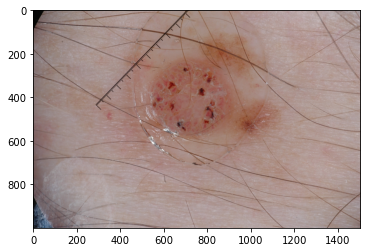

In [30]:
plt.imshow(image_input_train_1.numpy())

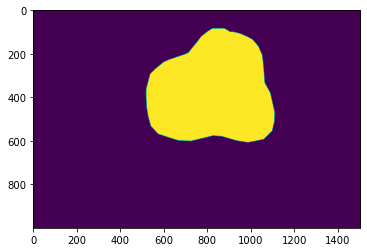

In [31]:
plt.imshow(np.squeeze(ground_truth_train_1.numpy()))